In [0]:
#라이브러리 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 
import platform #운영 체제 
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False 

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path="c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')
    
plt.style.use('ggplot')
    
plt.rcParams['axes.unicode_minus'] = False #graph에서 마이너스 방지

### 토양 정보 load

In [0]:
soil = pd.read_csv('../projectdata/soil_proportion.csv')
soil.head()

,Unnamed: 0,Unnamed: 0.1,6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,불소 F,비소 As,수소이온농도 pH,수은 Hg,...,아연 Zn,유기인,유류,카드뮴 Cd,테트라클로로에틸렌 PCE,트리클로로에틸렌 TCE,페놀류,폴리클로리네이티드비페닐 PCB,year,area
0,0,2009_강원도,0.016639,1.825236,3.565745,4.720800,0,0.222552,3.441,0.020646,...,28.360540,0.0,0,0.035018,0,0,0,0,2009,강원도
1,1,2009_경기도,0.015500,1.512000,3.172500,4.004000,0,0.182500,3.000,0.018000,...,24.922500,0.0,0,0.568000,0,0,0,0,2009,경기도
2,2,2009_경상남도,0.022662,18.159914,5.588024,8.359585,0,0.424772,5.694,0.034164,...,45.965821,0.0,0,1.082569,0,0,0,0,2009,경상남도
3,3,2009_경상북도,0.020724,16.132480,4.932260,7.175109,0,4.347152,4.962,0.029772,...,40.249795,0.0,0,0.942747,0,0,0,0,2009,경상북도
4,4,2009_광주광역시,0.018142,15.197822,4.720857,7.344918,0,4.302321,4.899,0.027224,...,39.279739,0.0,0,0.932324,0,0,0,0,2009,광주광역시


In [0]:
soil = soil.drop(soil.columns[0], axis=1)
soil.head()

,Unnamed: 0.1,6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,불소 F,비소 As,수소이온농도 pH,수은 Hg,시안 CN,아연 Zn,유기인,유류,카드뮴 Cd,테트라클로로에틸렌 PCE,트리클로로에틸렌 TCE,페놀류,폴리클로리네이티드비페닐 PCB,year,area
0,2009_강원도,0.016639,1.825236,3.565745,4.720800,0,0.222552,3.441,0.020646,0.001873,28.360540,0.0,0,0.035018,0,0,0,0,2009,강원도
1,2009_경기도,0.015500,1.512000,3.172500,4.004000,0,0.182500,3.000,0.018000,0.001500,24.922500,0.0,0,0.568000,0,0,0,0,2009,경기도
2,2009_경상남도,0.022662,18.159914,5.588024,8.359585,0,0.424772,5.694,0.034164,0.003748,45.965821,0.0,0,1.082569,0,0,0,0,2009,경상남도
3,2009_경상북도,0.020724,16.132480,4.932260,7.175109,0,4.347152,4.962,0.029772,0.003136,40.249795,0.0,0,0.942747,0,0,0,0,2009,경상북도
4,2009_광주광역시,0.018142,15.197822,4.720857,7.344918,0,4.302321,4.899,0.027224,0.003406,39.279739,0.0,0,0.932324,0,0,0,0,2009,광주광역시


In [0]:
year = []
area = []
for i in soil.iloc[:,0]:
    year.append(i[0:4])
    area.append(i[5:])

soil['year'] = pd.Series(year)
soil['area'] = pd.Series(area)

In [0]:
soil.head()

,Unnamed: 0.1,6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,불소 F,비소 As,수소이온농도 pH,수은 Hg,시안 CN,아연 Zn,유기인,유류,카드뮴 Cd,테트라클로로에틸렌 PCE,트리클로로에틸렌 TCE,페놀류,폴리클로리네이티드비페닐 PCB,year,area
0,2009_강원도,0.016639,1.825236,3.565745,4.720800,0,0.222552,3.441,0.020646,0.001873,28.360540,0.0,0,0.035018,0,0,0,0,2009,강원도
1,2009_경기도,0.015500,1.512000,3.172500,4.004000,0,0.182500,3.000,0.018000,0.001500,24.922500,0.0,0,0.568000,0,0,0,0,2009,경기도
2,2009_경상남도,0.022662,18.159914,5.588024,8.359585,0,0.424772,5.694,0.034164,0.003748,45.965821,0.0,0,1.082569,0,0,0,0,2009,경상남도
3,2009_경상북도,0.020724,16.132480,4.932260,7.175109,0,4.347152,4.962,0.029772,0.003136,40.249795,0.0,0,0.942747,0,0,0,0,2009,경상북도
4,2009_광주광역시,0.018142,15.197822,4.720857,7.344918,0,4.302321,4.899,0.027224,0.003406,39.279739,0.0,0,0.932324,0,0,0,0,2009,광주광역시


In [0]:
soil = soil[['6가크롬 Cr6+','구리 Cu', '납 Pb','니켈 Ni','비소 As','수소이온농도 pH','수은 Hg','시안 CN','아연 Zn','카드뮴 Cd','year','area']]
soil.head()

,6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,비소 As,수소이온농도 pH,수은 Hg,시안 CN,아연 Zn,카드뮴 Cd,year,area
0,0.016639,1.825236,3.565745,4.720800,0.222552,3.441,0.020646,0.001873,28.360540,0.035018,2009,강원도
1,0.015500,1.512000,3.172500,4.004000,0.182500,3.000,0.018000,0.001500,24.922500,0.568000,2009,경기도
2,0.022662,18.159914,5.588024,8.359585,0.424772,5.694,0.034164,0.003748,45.965821,1.082569,2009,경상남도
3,0.020724,16.132480,4.932260,7.175109,4.347152,4.962,0.029772,0.003136,40.249795,0.942747,2009,경상북도
4,0.018142,15.197822,4.720857,7.344918,4.302321,4.899,0.027224,0.003406,39.279739,0.932324,2009,광주광역시


In [0]:
chemical_names = ['6가크롬 Cr6+', '구리 Cu', '납 Pb', '니켈 Ni', '비소 As', '수소이온농도 pH', '수은 Hg',
       '시안 CN', '아연 Zn', '카드뮴 Cd']

In [0]:
soil_pivot_year = pd.pivot_table(soil, values=chemical_names, index=['year'],aggfunc=np.mean, fill_value=0)
soil_pivot_year

,6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,비소 As,수소이온농도 pH,수은 Hg,시안 CN,아연 Zn,카드뮴 Cd
year,,,,,,,,,,
2009,0.077855,11.683796,11.205521,7.777786,2.714712,3.850400,0.021252,0.002618,38.122163,0.689450
2010,0.224657,13.507582,17.490381,9.923958,3.792125,3.796144,0.020551,0.004294,46.245493,0.773257
2011,0.204755,12.582166,17.447841,9.092165,3.766353,3.833938,0.023520,0.006682,46.976593,0.587994
2012,0.058647,13.088711,14.274400,8.925260,3.706352,3.866984,0.021784,0.001058,45.776035,0.233080
2013,0.081009,13.362685,12.905841,9.417355,3.757021,3.766556,0.018357,0.000000,47.594295,0.083362
2014,0.129986,13.214889,13.792933,10.467342,3.967345,4.133684,0.018000,0.000461,52.042379,0.086290
2015,0.138632,12.347222,13.319863,8.105267,3.544996,3.966750,0.021431,0.000000,49.600388,0.098033
2016,0.086703,13.846406,12.455144,9.338187,3.320840,3.771743,0.024318,0.001435,53.644129,0.092991
2017,0.097715,14.309343,11.346913,8.452470,3.178843,3.702476,0.014962,0.000495,49.221173,0.076219


In [0]:
soil_pivot_year  = soil_pivot_year.iloc[1:,:] #생산량 데이터는 2009년 없음
soil_pivot_year

,6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,비소 As,수소이온농도 pH,수은 Hg,시안 CN,아연 Zn,카드뮴 Cd
year,,,,,,,,,,
2010,0.224657,13.507582,17.490381,9.923958,3.792125,3.796144,0.020551,0.004294,46.245493,0.773257
2011,0.204755,12.582166,17.447841,9.092165,3.766353,3.833938,0.023520,0.006682,46.976593,0.587994
2012,0.058647,13.088711,14.274400,8.925260,3.706352,3.866984,0.021784,0.001058,45.776035,0.233080
2013,0.081009,13.362685,12.905841,9.417355,3.757021,3.766556,0.018357,0.000000,47.594295,0.083362
2014,0.129986,13.214889,13.792933,10.467342,3.967345,4.133684,0.018000,0.000461,52.042379,0.086290
2015,0.138632,12.347222,13.319863,8.105267,3.544996,3.966750,0.021431,0.000000,49.600388,0.098033
2016,0.086703,13.846406,12.455144,9.338187,3.320840,3.771743,0.024318,0.001435,53.644129,0.092991
2017,0.097715,14.309343,11.346913,8.452470,3.178843,3.702476,0.014962,0.000495,49.221173,0.076219
2018,0.184359,16.347197,11.947586,12.535044,3.468227,4.322006,0.024505,0.000000,56.156873,0.059903


In [0]:
soil_pivot_year = soil_pivot_year.astype(float)
soil_pivot_year.dtypes

6가크롬 Cr6+    float64
구리 Cu        float64
납 Pb         float64
니켈 Ni        float64
비소 As        float64
수소이온농도 pH    float64
수은 Hg        float64
시안 CN        float64
아연 Zn        float64
카드뮴 Cd       float64
dtype: object

### 양파 생산량 load

In [0]:
onion_unit_output = pd.read_csv('../projectdata/onion_unit_output.csv')
onion_unit_output.head()

,year_local,area,year,10a당 생산량 (kg)
0,2010_부산광역시,부산광역시,2010,7163
1,2011_부산광역시,부산광역시,2011,7393
2,2012_부산광역시,부산광역시,2012,6303
3,2013_부산광역시,부산광역시,2013,8265
4,2014_부산광역시,부산광역시,2014,7271


In [0]:
onion_unit_pivot = pd.pivot_table(onion_unit_output, values='10a당 생산량 (kg)', index=['area'],aggfunc=np.mean, fill_value=0)
onion_unit_pivot

,10a당 생산량 (kg)
area,
강원도,4811.1
경기도,4867.7
경상남도,7114.6
경상북도,6809.1
광주광역시,6319.1
대구광역시,6542.3
대전광역시,5335.8
부산광역시,6785.0
울산광역시,5615.2


In [0]:
onion_unit_pivot1 = pd.pivot_table(onion_unit_output, values='10a당 생산량 (kg)', index=['year'],aggfunc=np.mean)
onion_unit_pivot1

,10a당 생산량 (kg)
year,
2010,5302.533333
2011,5782.533333
2012,5038.266667
2013,5638.733333
2014,5983.533333
2015,5342.066667
2016,6499.266667
2017,5842.800000
2018,6028.133333


In [0]:
onion_unit_pivot1 = onion_unit_pivot1.iloc[:-1,:] # soil 데이터는 2019년 없음
onion_unit_pivot1

,10a당 생산량 (kg)
year,
2010,5302.533333
2011,5782.533333
2012,5038.266667
2013,5638.733333
2014,5983.533333
2015,5342.066667
2016,6499.266667
2017,5842.800000
2018,6028.133333


#### 년도별 토양 정보 & 생산량

In [0]:
import seaborn as sns
def boxplot(data):
     for i in range(len(data.columns)):

        plt.style.use('ggplot') # Using ggplot2 style visuals 

        f, ax = plt.subplots(figsize=(8, 5))

        ax.set_facecolor('#fafafa')
        plt.title(data.columns[i], fontsize=10)
        ax = sns.boxplot(data = data.iloc[:,i], orient = 'h', palette = 'Set2')

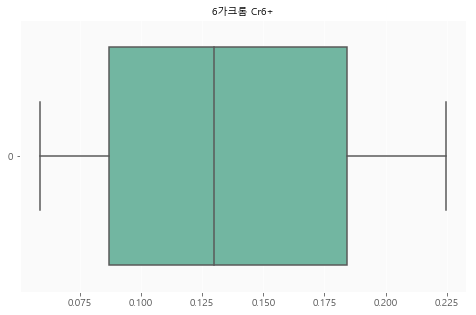

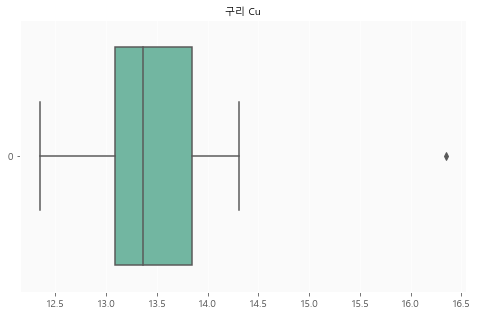

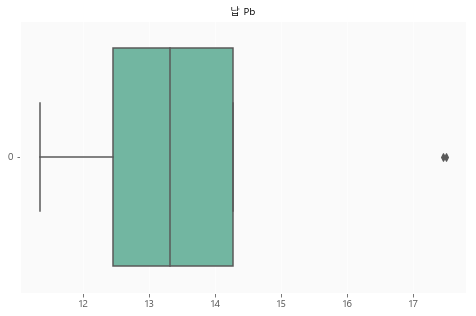

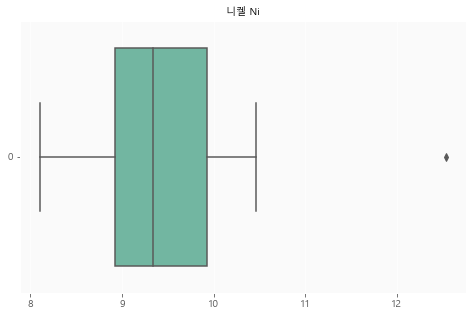

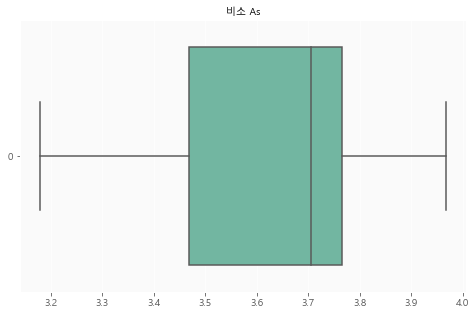

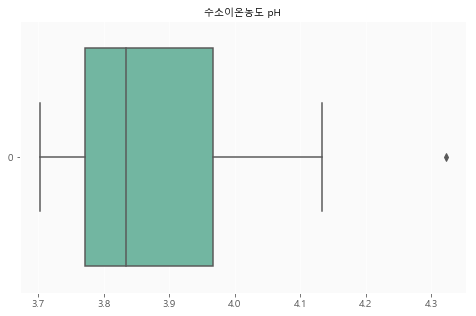

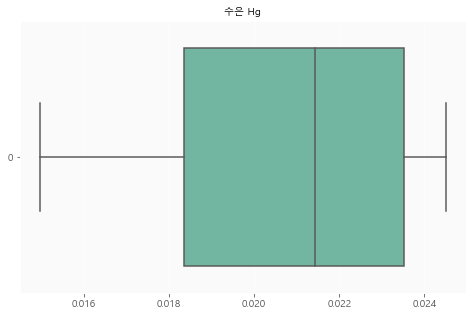

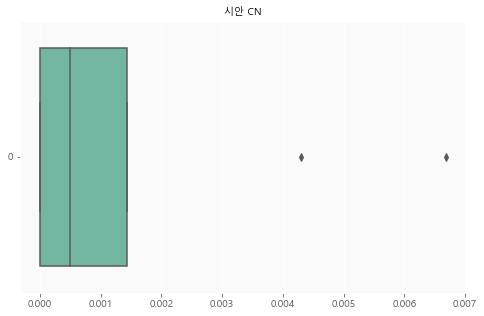

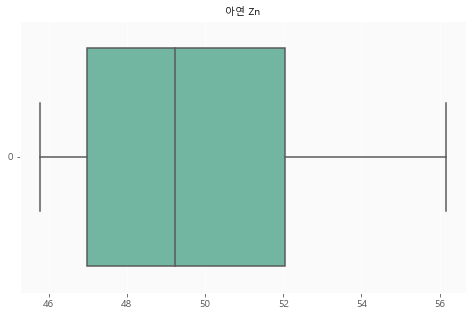

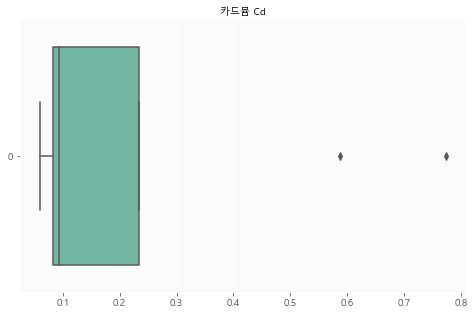

In [0]:
boxplot(soil_pivot_year)

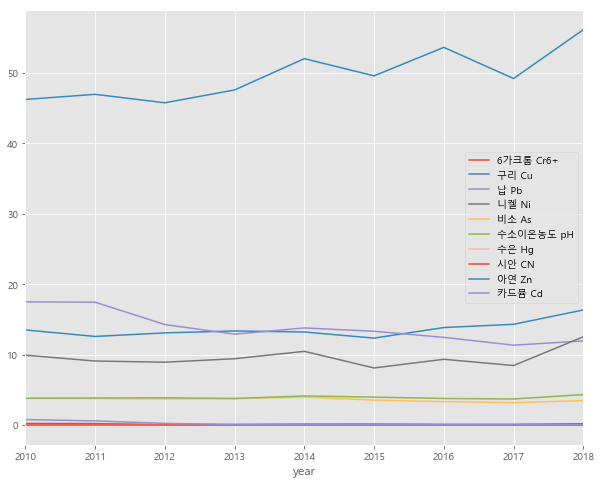

In [0]:
soil_pivot_year.plot(figsize=(10,8))

In [0]:
onion_unit_pivot1.index = onion_unit_pivot1.index.map(int)
soil_pivot_year.index = soil_pivot_year.index.map(int)

In [0]:
yearly_result = pd.concat([onion_unit_pivot1,soil_pivot_year], axis=1)
yearly_result

,10a당 생산량 (kg),6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,비소 As,수소이온농도 pH,수은 Hg,시안 CN,아연 Zn,카드뮴 Cd
year,,,,,,,,,,,
2010,5302.533333,0.224657,13.507582,17.490381,9.923958,3.792125,3.796144,0.020551,0.004294,46.245493,0.773257
2011,5782.533333,0.204755,12.582166,17.447841,9.092165,3.766353,3.833938,0.023520,0.006682,46.976593,0.587994
2012,5038.266667,0.058647,13.088711,14.274400,8.925260,3.706352,3.866984,0.021784,0.001058,45.776035,0.233080
2013,5638.733333,0.081009,13.362685,12.905841,9.417355,3.757021,3.766556,0.018357,0.000000,47.594295,0.083362
2014,5983.533333,0.129986,13.214889,13.792933,10.467342,3.967345,4.133684,0.018000,0.000461,52.042379,0.086290
2015,5342.066667,0.138632,12.347222,13.319863,8.105267,3.544996,3.966750,0.021431,0.000000,49.600388,0.098033
2016,6499.266667,0.086703,13.846406,12.455144,9.338187,3.320840,3.771743,0.024318,0.001435,53.644129,0.092991
2017,5842.800000,0.097715,14.309343,11.346913,8.452470,3.178843,3.702476,0.014962,0.000495,49.221173,0.076219
2018,6028.133333,0.184359,16.347197,11.947586,12.535044,3.468227,4.322006,0.024505,0.000000,56.156873,0.059903


In [0]:
yearly_soil_corr = yearly_result.corr()
yearly_soil_corr = round(yearly_soil_corr,2)
yearly_soil_corr

,10a당 생산량 (kg),6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,비소 As,수소이온농도 pH,수은 Hg,시안 CN,아연 Zn,카드뮴 Cd
10a당 생산량 (kg),1.00,-0.03,0.44,-0.42,0.36,-0.39,0.16,0.17,-0.09,0.77,-0.39
6가크롬 Cr6+,-0.03,1.00,0.12,0.63,0.40,0.28,0.31,0.31,0.63,0.03,0.69
구리 Cu,0.44,0.12,1.00,-0.51,0.77,-0.45,0.49,0.15,-0.34,0.69,-0.31
납 Pb,-0.42,0.63,-0.51,1.00,-0.10,0.65,-0.19,0.25,0.88,-0.61,0.94
니켈 Ni,0.36,0.40,0.77,-0.10,1.00,0.17,0.78,0.34,-0.12,0.64,-0.07
비소 As,-0.39,0.28,-0.45,0.65,0.17,1.00,0.22,0.01,0.31,-0.38,0.42
수소이온농도 pH,0.16,0.31,0.49,-0.19,0.78,0.22,1.00,0.34,-0.32,0.66,-0.30
수은 Hg,0.17,0.31,0.15,0.25,0.34,0.01,0.34,1.00,0.31,0.31,0.19
시안 CN,-0.09,0.63,-0.34,0.88,-0.12,0.31,-0.32,0.31,1.00,-0.46,0.89
아연 Zn,0.77,0.03,0.69,-0.61,0.64,-0.38,0.66,0.31,-0.46,1.00,-0.59


Text(0.5, 1.0, '양파 단수와 토양 오염의 상관관계 (년도별)')

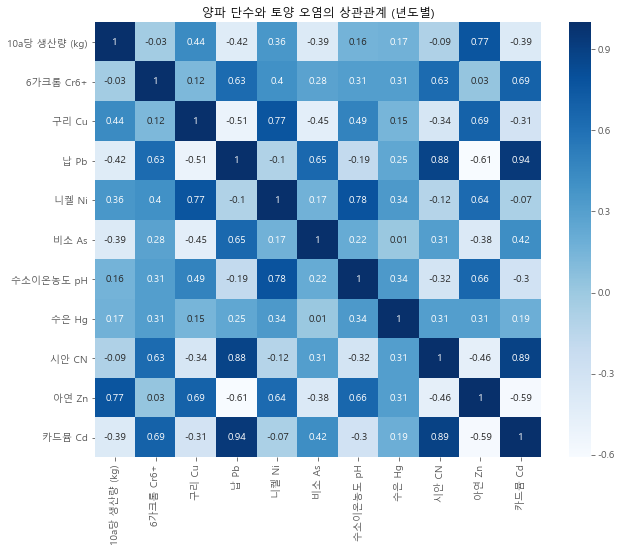

In [0]:
import seaborn as sns 
plt.figure(figsize=(10,8))
sns.heatmap(yearly_soil_corr,annot = True,  cmap="Blues")
plt.title('양파 단수와 토양 오염의 상관관계 (년도별)', fontsize=12)

**년도별 토양 오염과 양파 단위당 생산량의 상관관계 분석 결과**
-  .9 이상 상관관계가 아주 높다 : 없음
-  .7~.9미만 상관관계가 높다 : 아연
- .4~.7미만 상관관계가 다소 높다 : 구리, 납
- .2~.4미만 상관관계가 있으나 낮다: 카드뮴, 비소, 니켈
- .2미만 상관관계가 거의 없다: 6가크롬, 시안, 수소이온농도

In [0]:
yearly_result

,10a당 생산량 (kg),6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,비소 As,수소이온농도 pH,수은 Hg,시안 CN,아연 Zn,카드뮴 Cd
year,,,,,,,,,,,
2010,5302.533333,0.224657,13.507582,17.490381,9.923958,3.792125,3.796144,0.020551,0.004294,46.245493,0.773257
2011,5782.533333,0.204755,12.582166,17.447841,9.092165,3.766353,3.833938,0.023520,0.006682,46.976593,0.587994
2012,5038.266667,0.058647,13.088711,14.274400,8.925260,3.706352,3.866984,0.021784,0.001058,45.776035,0.233080
2013,5638.733333,0.081009,13.362685,12.905841,9.417355,3.757021,3.766556,0.018357,0.000000,47.594295,0.083362
2014,5983.533333,0.129986,13.214889,13.792933,10.467342,3.967345,4.133684,0.018000,0.000461,52.042379,0.086290
2015,5342.066667,0.138632,12.347222,13.319863,8.105267,3.544996,3.966750,0.021431,0.000000,49.600388,0.098033
2016,6499.266667,0.086703,13.846406,12.455144,9.338187,3.320840,3.771743,0.024318,0.001435,53.644129,0.092991
2017,5842.800000,0.097715,14.309343,11.346913,8.452470,3.178843,3.702476,0.014962,0.000495,49.221173,0.076219
2018,6028.133333,0.184359,16.347197,11.947586,12.535044,3.468227,4.322006,0.024505,0.000000,56.156873,0.059903


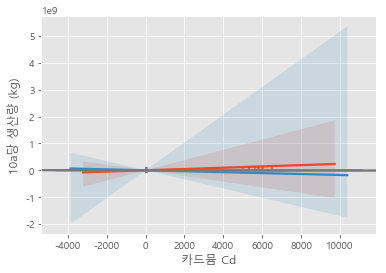

In [0]:
for i in yearly_result:
    ax = sns.regplot(x = i, y='10a당 생산량 (kg)', data = yearly_result, marker="+")

## **'아연','구리','납'이 각각 단위 생산량과 상관관계가 높다고 가정하고, 다변량 regression 실행. 실행 결과 p-value와 R-square를 바탕으로 최종 variable 선정할 예정!**

In [0]:
import statsmodels.api as sm

X = yearly_result[['아연 Zn','구리 Cu','납 Pb']]
y = yearly_result['10a당 생산량 (kg)']

X = sm.add_constant(X)
yearly_soil = sm.OLS(y, X).fit()
yearly_soil.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          10a당 생산량 (kg)   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     2.608
Date:                Mon, 02 Mar 2020   Prob (F-statistic):              0.164
Time:                        16:21:45   Log-Likelihood:                -62.870
No. Observations:                   9   AIC:                             133.7
Df Residuals:                       5   BIC:                             134.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        716.3652   2970.480      0.241      0.819   -6919.498    8352.228
아연 Zn        113.8551     52.534      2.167      0.082     -21.189     248.899
구리 Cu        -60.2409    145.964     -0.413      0.697    -435.452     314.971
납 Pb          11.7935     71.472      0.165      0.875    -171.930     195.517
==============================================================================
Omnibus:                        1.245   Durbin-Watson:                   2.724
Prob(Omnibus):                  0.537   Jarque-Bera (JB):                0.687
Skew:                          -0.180   Prob(JB):                        0.709
Kurtosis:                       1.695   Cond. No.                     1.36e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
import statsmodels.api as sm

X = yearly_result[['아연 Zn','구리 Cu']]
y = yearly_result['10a당 생산량 (kg)']

X = sm.add_constant(X)
yearly_soil = sm.OLS(y, X).fit()
yearly_soil.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          10a당 생산량 (kg)   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     4.652
Date:                Mon, 02 Mar 2020   Prob (F-statistic):             0.0603
Time:                        16:22:03   Log-Likelihood:                -62.895
No. Observations:                   9   AIC:                             131.8
Df Residuals:                       6   BIC:                             132.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1110.9783   1612.859      0.689      0.517   -2835.544    5057.501
아연 Zn        110.2303     43.682      2.524      0.045       3.346     217.115
구리 Cu        -63.9629    132.003     -0.485      0.645    -386.963     259.038
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.755
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.622
Skew:                          -0.224   Prob(JB):                        0.733
Kurtosis:                       1.792   Cond. No.                         778.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
import statsmodels.api as sm

X = yearly_result[['아연 Zn']]
y = yearly_result['10a당 생산량 (kg)']

X = sm.add_constant(X)
yearly_soil = sm.OLS(y, X).fit()
yearly_soil.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          10a당 생산량 (kg)   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     10.18
Date:                Mon, 02 Mar 2020   Prob (F-statistic):             0.0153
Time:                        16:22:13   Log-Likelihood:                -63.068
No. Observations:                   9   AIC:                             130.1
Df Residuals:                       7   BIC:                             130.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        961.2404   1493.953      0.643      0.540   -2571.396    4493.877
아연 Zn         95.7093     29.993      3.191      0.015      24.786     166.633
==============================================================================
Omnibus:                        1.552   Durbin-Watson:                   2.791
Prob(Omnibus):                  0.460   Jarque-Bera (JB):                0.715
Skew:                          -0.000   Prob(JB):                        0.699
Kurtosis:                       1.619   Cond. No.                         737.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**>>>>>>>>>>>>>>>>>>>'아연'만 선택됨 (아연 outlier 없음 + p_value 낮음 + adjusted Rsquare) 

- MinMaxScaling Code

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
yearly_result_sc = scaler.fit_transform(yearly_result)
yearly_result_sc = pd.DataFrame(yearly_result_sc, columns = yearly_result.columns, index =yearly_result.index.values)
yearly_result_sc

## 지역별 토양 성분 & 단위 생산량 EDA 

In [0]:
soil_pivot_area = pd.pivot_table(soil, values=chemical_names, index=['area'],aggfunc=np.mean)
soil_pivot_area

,6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,비소 As,수소이온농도 pH,수은 Hg,시안 CN,아연 Zn,카드뮴 Cd
area,,,,,,,,,,
강원도,0.110115,11.498285,11.992096,8.434884,3.005206,3.557164,0.019032,0.001454,43.902301,0.247106
경기도,0.098080,10.621142,10.910187,7.728506,2.732589,3.232965,0.017221,0.001315,40.309390,0.264795
경상남도,0.190188,19.315489,19.372866,13.737375,4.908520,5.867316,0.032002,0.003386,70.143119,0.498891
경상북도,0.161020,16.889094,16.589085,11.729763,4.578447,5.000216,0.027132,0.002190,60.135828,0.403608
광주광역시,0.127244,13.481954,13.245805,9.288867,3.738024,3.978272,0.021308,0.001736,48.008560,0.300717
대구광역시,0.182674,18.548680,20.140728,13.189081,5.162484,5.650243,0.030623,0.002606,67.147425,0.377720
대전광역시,0.106492,11.421701,12.046252,7.547365,2.978351,3.199900,0.017261,0.001312,39.373510,0.223709
부산광역시,0.125490,11.646389,12.062719,8.008262,3.110917,3.331096,0.017202,0.001253,42.502868,0.217306
울산광역시,0.102031,11.740670,11.755739,8.162140,3.018436,3.260351,0.016593,0.001273,41.576267,0.213622


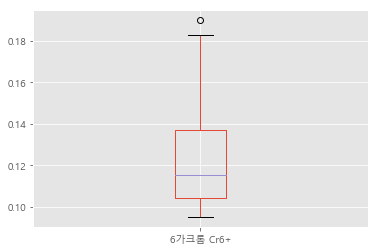

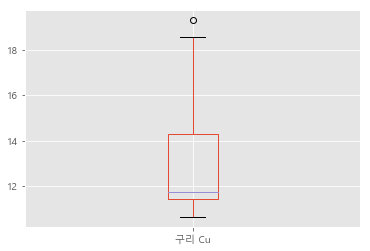

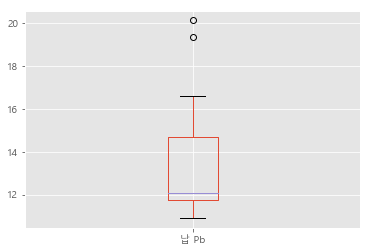

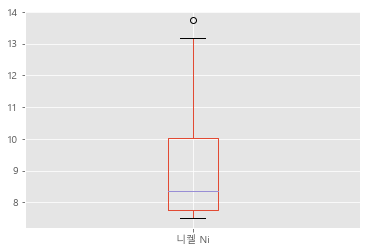

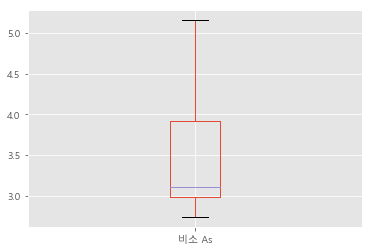

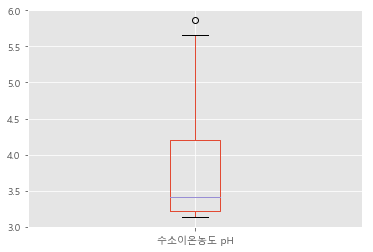

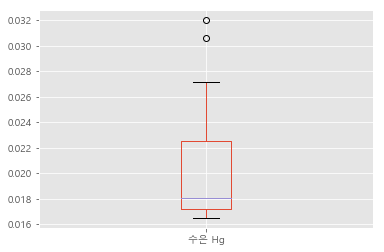

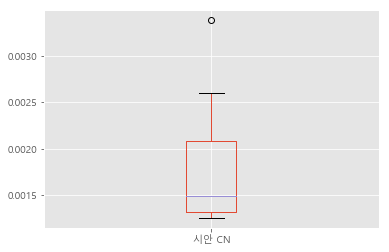

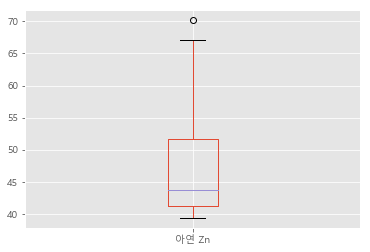

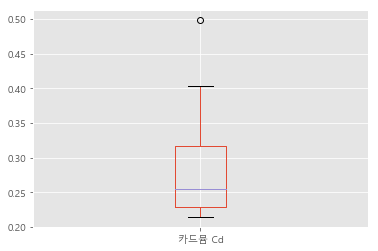

In [0]:
for column in soil_pivot_area:
    plt.figure()
    soil_pivot_area.boxplot([column])

In [0]:
onion_unit_pivot.index = onion_unit_pivot.index.map(str)
soil_pivot_area.index = soil_pivot_area.index.map(str)


area_result = pd.concat([onion_unit_pivot,soil_pivot_area], axis=1)
area_result

,10a당 생산량 (kg),6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,비소 As,수소이온농도 pH,수은 Hg,시안 CN,아연 Zn,카드뮴 Cd
area,,,,,,,,,,,
강원도,4811.1,0.110115,11.498285,11.992096,8.434884,3.005206,3.557164,0.019032,0.001454,43.902301,0.247106
경기도,4867.7,0.098080,10.621142,10.910187,7.728506,2.732589,3.232965,0.017221,0.001315,40.309390,0.264795
경상남도,7114.6,0.190188,19.315489,19.372866,13.737375,4.908520,5.867316,0.032002,0.003386,70.143119,0.498891
경상북도,6809.1,0.161020,16.889094,16.589085,11.729763,4.578447,5.000216,0.027132,0.002190,60.135828,0.403608
광주광역시,6319.1,0.127244,13.481954,13.245805,9.288867,3.738024,3.978272,0.021308,0.001736,48.008560,0.300717
대구광역시,6542.3,0.182674,18.548680,20.140728,13.189081,5.162484,5.650243,0.030623,0.002606,67.147425,0.377720
대전광역시,5335.8,0.106492,11.421701,12.046252,7.547365,2.978351,3.199900,0.017261,0.001312,39.373510,0.223709
부산광역시,6785.0,0.125490,11.646389,12.062719,8.008262,3.110917,3.331096,0.017202,0.001253,42.502868,0.217306
울산광역시,5615.2,0.102031,11.740670,11.755739,8.162140,3.018436,3.260351,0.016593,0.001273,41.576267,0.213622


In [0]:
yearly_result

,10a당 생산량 (kg),6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,비소 As,수소이온농도 pH,수은 Hg,시안 CN,아연 Zn,카드뮴 Cd
year,,,,,,,,,,,
2010,5302.533333,0.224657,13.507582,17.490381,9.923958,3.792125,3.796144,0.020551,0.004294,46.245493,0.773257
2011,5782.533333,0.204755,12.582166,17.447841,9.092165,3.766353,3.833938,0.023520,0.006682,46.976593,0.587994
2012,5038.266667,0.058647,13.088711,14.274400,8.925260,3.706352,3.866984,0.021784,0.001058,45.776035,0.233080
2013,5638.733333,0.081009,13.362685,12.905841,9.417355,3.757021,3.766556,0.018357,0.000000,47.594295,0.083362
2014,5983.533333,0.129986,13.214889,13.792933,10.467342,3.967345,4.133684,0.018000,0.000461,52.042379,0.086290
2015,5342.066667,0.138632,12.347222,13.319863,8.105267,3.544996,3.966750,0.021431,0.000000,49.600388,0.098033
2016,6499.266667,0.086703,13.846406,12.455144,9.338187,3.320840,3.771743,0.024318,0.001435,53.644129,0.092991
2017,5842.800000,0.097715,14.309343,11.346913,8.452470,3.178843,3.702476,0.014962,0.000495,49.221173,0.076219
2018,6028.133333,0.184359,16.347197,11.947586,12.535044,3.468227,4.322006,0.024505,0.000000,56.156873,0.059903


In [0]:
area_result_corr = area_result.corr()
area_result_corr = round(area_result_corr,2)
area_result_corr

,10a당 생산량 (kg),6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,비소 As,수소이온농도 pH,수은 Hg,시안 CN,아연 Zn,카드뮴 Cd
10a당 생산량 (kg),1.00,0.66,0.65,0.62,0.62,0.66,0.63,0.60,0.68,0.64,0.60
6가크롬 Cr6+,0.66,1.00,0.98,0.97,0.98,0.98,0.98,0.97,0.87,0.98,0.92
구리 Cu,0.65,0.98,1.00,0.99,0.99,0.99,0.99,0.99,0.92,0.99,0.95
납 Pb,0.62,0.97,0.99,1.00,0.99,0.99,0.98,0.98,0.90,0.99,0.91
니켈 Ni,0.62,0.98,0.99,0.99,1.00,0.98,1.00,0.99,0.91,1.00,0.95
비소 As,0.66,0.98,0.99,0.99,0.98,1.00,0.98,0.98,0.88,0.98,0.92
수소이온농도 pH,0.63,0.98,0.99,0.98,1.00,0.98,1.00,1.00,0.91,1.00,0.96
수은 Hg,0.60,0.97,0.99,0.98,0.99,0.98,1.00,1.00,0.91,0.99,0.96
시안 CN,0.68,0.87,0.92,0.90,0.91,0.88,0.91,0.91,1.00,0.92,0.92
아연 Zn,0.64,0.98,0.99,0.99,1.00,0.98,1.00,0.99,0.92,1.00,0.95


Text(0.5, 1.0, '양파 단수와 토양 오염의 상관관계 (지역별)')

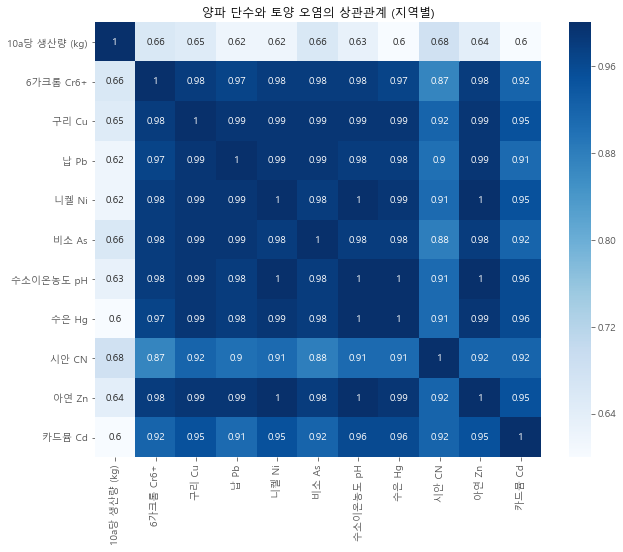

In [0]:
import seaborn as sns 
plt.figure(figsize=(10,8))
sns.heatmap(area_result_corr,annot = True,  cmap="Blues")
plt.title('양파 단수와 토양 오염의 상관관계 (지역별)', fontsize=12)

#### 다중공성성(VIF) 확인

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame() #빈 데이터 프레임 만들기 
vif["VIF Factor"] = [variance_inflation_factor(
    soil_pivot_area.values, i) for i in range(soil_pivot_area.shape[1])] #각각의 컬럼에 VIP구하기 
vif["features"] = soil_pivot_area.columns
vif

,VIF Factor,features
0,617.843201,6가크롬 Cr6+
1,4916.593582,구리 Cu
2,2406.478342,납 Pb
3,10995.207421,니켈 Ni
4,2076.276219,비소 As
5,15972.499277,수소이온농도 pH
6,3932.222046,수은 Hg
7,91.131461,시안 CN
8,5741.651180,아연 Zn
9,500.017756,카드뮴 Cd


## >>> 다중공선성 엄청 높음.. 

### 일단 모두 넣고 regression 실시

In [0]:
import statsmodels.api as sm

X = area_result[['6가크롬 Cr6+', '구리 Cu', '납 Pb', '니켈 Ni', '비소 As',
       '수소이온농도 pH', '수은 Hg', '시안 CN', '아연 Zn', '카드뮴 Cd']]
y = area_result['10a당 생산량 (kg)']

X = sm.add_constant(X)
yearly_soil = sm.OLS(y, X).fit()
yearly_soil.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          10a당 생산량 (kg)   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     2.351
Date:                Mon, 02 Mar 2020   Prob (F-statistic):              0.213
Time:                        17:32:06   Log-Likelihood:                -108.35
No. Observations:                  15   AIC:                             238.7
Df Residuals:                       4   BIC:                             246.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6748.9877   3131.631      2.155      0.097   -1945.813    1.54e+04
6가크롬 Cr6+   6.344e+04   4.01e+04      1.581      0.189    -4.8e+04    1.75e+05
구리 Cu       -197.9925   1017.332     -0.195      0.855   -3022.560    2626.575
납 Pb        -846.4821    585.789     -1.445      0.222   -2472.894     779.930
니켈 Ni        990.7066   2520.031      0.393      0.714   -6006.022    7987.436
비소 As       3564.4132   2512.750      1.419      0.229   -3412.098    1.05e+04
수소이온농도 pH   2955.6586   5333.122      0.554      0.609   -1.19e+04    1.78e+04
수은 Hg      -5.441e+05   4.98e+05     -1.092      0.336   -1.93e+06    8.39e+05
시안 CN       3.204e+06   1.49e+06      2.152      0.098    -9.3e+05    7.34e+06
아연 Zn       -412.6536    494.585     -0.834      0.451   -1785.841     960.534
카드뮴 Cd     -8513.4658   1.25e+04     -0.680      0.534   -4.33e+04    2.62e+04
==============================================================================
Omnibus:                        2.521   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                1.087
Skew:                          -0.649   Prob(JB):                        0.581
Kurtosis:                       3.233   Cond. No.                     4.85e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
area_result.columns

Index(['10a당 생산량 (kg)', '6가크롬 Cr6+', '구리 Cu', '납 Pb', '니켈 Ni', '비소 As',
       '수소이온농도 pH', '수은 Hg', '시안 CN', '아연 Zn', '카드뮴 Cd'],
      dtype='object')

### 다중공성성 등의 이유로 제대로 된 Regression 모델을 수립할 수 없으므로 Stepwise 로 최적의 변수 조합 선택

In [0]:
########전진선택법(step=1)

def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [0]:
######## 후진선택법(step=1)
import itertools

def backward(X,y,predictors):
    tic = time.time()
    results = []
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [0]:
def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}

In [0]:
import time

def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [0]:
Stepwise_best_model=Stepwise_model(X,y)

C:\Users\sundooedu\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  
C:\Users\sundooedu\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  if sys.path[0] == '':


Processed  10 models on 1 predictors in 0.013962030410766602
Selected predictors: ['시안 CN', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020EC8399FD0>
forward
Processed  1 models on 0 predictors in 0.0029668807983398438
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020EC83996A0>
Processed  9 models on 2 predictors in 0.013972997665405273
Selected predictors: ['시안 CN', '6가크롬 Cr6+', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020EC83996D8>
forward
Processed  2 models on 1 predictors in 0.003969907760620117
Selected predictors: ['시안 CN', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020EC8398208>
backward
Processed  9 models on 2 predictors in 0.01099705696105957
Selected predictors: ['시안 CN', '6가크롬 Cr6+', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapp

In [0]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          10a당 생산량 (kg)   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     11.47
Date:                Mon, 02 Mar 2020   Prob (F-statistic):            0.00486
Time:                        17:38:08   Log-Likelihood:                -118.07
No. Observations:                  15   AIC:                             240.1
Df Residuals:                      13   BIC:                             241.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
시안 CN       1.015e+06      3e+05      3.387      0.005    3.68e+05    1.66e+06
const       4019.0871    559.152      7.188      0.000    2811.113    5227.061
==============================================================================
Omnibus:                        1.437   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.488   Jarque-Bera (JB):                0.584
Skew:                           0.483   Prob(JB):                        0.747
Kurtosis:                       3.016   Cond. No.                     1.70e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## - 지역별 토양 정보와 단위 생산량의 관계를 바탕으로 변수선택법(stepwise)를 활용해 회귀분석(Regression)을 한 결과 '시안 CN'이 양파 단위 유의미한 상관관계가 존재함을 도출...  

## - 년도별 토양 정보 & 단위 생산량의 관계 --> '아연' 이 유의미 

## - 지역별 토양 정보와 단위 생산량의 관계 --> '시안'이 유의미 

## ---> 최종 모델에서 단위 생산량에 영향을 미칠 수 있는 변수로 토양 데이터 중 '아연'과 '시안'을 선택